## Recreating figure 3.7 from Bishop's "Pattern Recognition and Machine Learning."

This notebook provides scaffolding for your exploration Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, through this notebook you will reproduce several variants of figure 3.7 from Bishop's book.

## Instructions:

### 5.1-3:

Implement the functions in `problem` -- completed implementations of these functions are needed to generate the plots.

In [ ]:
def likelihood_func(w, X, y_train, likelihood_var):
    '''
    Implement likelihood_func. This function returns the data likelihood
    given f(y_train | X; w) ~ Normal(Xw, likelihood_var).

    Args:
        w: Weights
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''
    y_pred = np.array(X@w)[0]
    try:
        likelihood = multivariate_normal.pdf(y_train.flatten(), mean=y_pred, cov=likelihood_var)
    except:
        pdb.set_trace()
    if not type(likelihood) == np.float64:
        pdb.set_trace()
    return likelihood

\newpage

In [ ]:
def get_posterior_params(X, y_train, prior, likelihood_var = 0.2**2):
    '''
    Implement get_posterior_params. This function returns the posterior
    mean vector \mu_p and posterior covariance matrix \Sigma_p for
    Bayesian regression (normal likelihood and prior).

    Note support_code.make_plots takes this completed function as an argument.

    Args:
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        prior: Prior parameters; dict with 'mean' (prior mean np.matrix)
               and 'var' (prior covariance np.matrix)
        likelihood_var: likelihood variance- default (0.2**2) per the lecture slides

    Returns:
        post_mean: Posterior mean (np.matrix)
        post_var: Posterior mean (np.matrix)
    '''
    S_0 = prior['var']
    m_0 = prior['mean']
    post_mean = (X.T@X + likelihood_var*S_0.getI()).getI()@(X.T@y_train)
    post_var = ((1/likelihood_var)*X.T@X + S_0.getI()).getI()
    return post_mean, post_var

\newpage

In [ ]:
def get_predictive_params(X_new, post_mean, post_var, likelihood_var = 0.2**2):
    '''
    Implement get_predictive_params. This function returns the predictive
    distribution parameters (mean and variance) given the posterior mean
    and covariance matrix (returned from get_posterior_params) and the
    likelihood variance (default value from lecture).

    Args:
        X_new: New observation (np.matrix object)
        post_mean, post_var: Returned from get_posterior_params
        likelihood_var: likelihood variance (0.2**2) per the lecture slides

    Returns:
        - pred_mean: Mean of predictive distribution
        - pred_var: Variance of predictive distribution
    '''
    #pdb.set_trace()
    pred_mean = post_mean.T @ X_new
    pred_var = likelihood_var + X_new.T @ post_var @ X_new
    #pdb.set_trace()
    return float(pred_mean), float(pred_var)

In [3]:
from support_code import *
from problem import *

\newpage

## Instructions (continued):

### 5.4:

If your implementations are correct, then the next few code blocks in this notebook will generate the required variants of Bishop's figure. These are the same figures that you would obtain if you ran `python problem.py` from the command line -- this notebook is just provided as additional support.

In [4]:
# Generate our simulated dataset
# Note we are using sigma == 0.2

np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
data_size = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = generate_data(data_size,
                               noise,
                               actual_weights)

Next, we generate the plots using 3 different prior covariance matrix. In the main call to `problem.py`, this is done in a loop -- here we wrap the loop body in a short helper function.

In [9]:
def make_plot_given_sigma(sigma_squared):
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    make_plots(actual_weights,
               xtrain,
               ytrain,
               likelihood_var,
               prior,
               likelihood_func,
               get_posterior_params,
               get_predictive_params,
               sigma_squared)

In [8]:
sigmas = [1/2, 1/(2**5), 1/(2**10)]

#### First covariance matrix:
$$\Sigma_{0} = \frac{1}{2}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

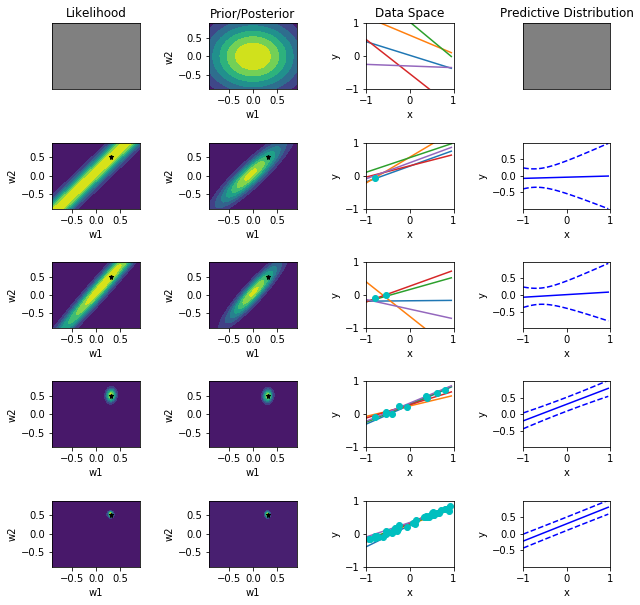

In [7]:
try:
    make_plot_given_sigma(sigmas[0])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

#### Second covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{5}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

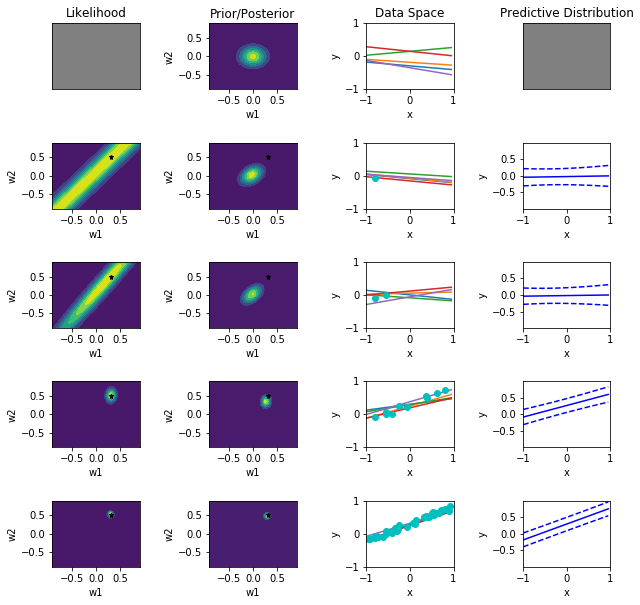

In [8]:
try:
    make_plot_given_sigma(sigmas[1])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

#### Third covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{10}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

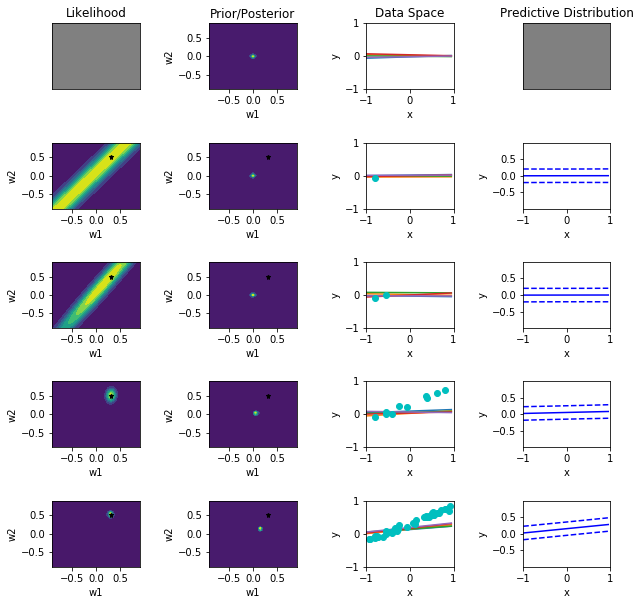

In [9]:
try:
    make_plot_given_sigma(sigmas[2])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

## Instructions (continued):

### 5.5:

The likelihood function is unaffected by the strength of the prior. As more samples are drawn, the likelihood function becomes more centered around the true parameters and its variance decreases.

The posterior distribution is strongly affected by the strength of the prior. In the final plot, the prior is so strong, that even after many observations, our parameter distribution has not come close to the true values.

The predictive distribution is also strongly affected by the strength of the prior. With a weak prior, there is high variance around unseen values. With a strong prior, although the variance is reduced, the predictive distribution is not able to converge to the true values.

## Instructions (continued):

### 5.6:

For question (6), find the MAP solution for the first prior covariance $\left(\frac{1}{2}I\right)$ by completing the implementation below. In addition, be sure to justify the value for the regularization coefficient (in `sklearn` named `alpha`) in your written work.

In [1]:
from sklearn.linear_model import Ridge

In [15]:
n = len(ytrain)
alpha = 1/(2*n*sigmas[0])
#alpha = 9999 # Change to the correct value
ridge = Ridge(alpha=alpha,
              fit_intercept=False,
              solver='cholesky')

ridge.fit(xtrain, ytrain)

Ridge(alpha=0.025, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

If alpha is set correctly, ridge.coef_ will equal the prior mean/MAP estimate returned by the next two cells.

In [16]:
ridge.coef_

array([[0.30085783, 0.52614072]])

In [14]:
prior = {"mean":np.matrix([[0], [0]]),
         "var":matlib.eye(2) * sigmas[0]}


post = get_posterior_params(xtrain, ytrain, prior,
                                likelihood_var = 0.2**2)
post[0].ravel()

matrix([[0.30052135, 0.52406189]])